# Deep Dive into Titantic Tickets and Fare

### Author: Vrushali Koli

## General 

In [156]:
import pandas as pd
pd.set_option('display.max_columns', 999)
import numpy as np
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
path = os.getcwd()
student_file = path + '/TitanicData.csv'
df = pd.read_csv(student_file, index_col=0)
df.head()

,pclass,survived,name,sex,age,siblings/spouses,parents/children,ticket,fare,cabin,embarked,boat,body,home.dest
pid,,,,,,,,,,,,,,
1,3,0,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.55,NaN,S,NaN,NaN,NaN
2,3,0,"Abbott, Master. Eugene Joseph",male,13.0,0,2,C.A. 2673,20.25,NaN,S,NaN,NaN,"East Providence, RI"
3,3,0,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.25,NaN,S,NaN,190.0,"East Providence, RI"
4,3,1,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.25,NaN,S,A,NaN,"East Providence, RI"
5,3,1,"Abelseth, Miss. Karen Marie",female,16.0,0,0,348125,7.65,NaN,S,16,NaN,"Norway Los Angeles, CA"


In [7]:
# Taken from columnStats.ipnyb
#funcitionality to get outliers for floats (fare column)
outliers = []
nums = df['fare'].sort_values()
q1 = 7.90
q2 = 14.45
q3 = 31.28
IQR = q3-q1
sz1 = q1-1.5*IQR
sz2 = q3+1.5*IQR
count = 0

# drop the outliers 
df2 = df[df['fare'] > 66.3]
df_copy = df
df_copy

df_copy.drop(df2.index, inplace=True)
df_copy

,pclass,survived,name,sex,age,siblings/spouses,parents/children,ticket,fare,cabin,embarked,boat,body,home.dest
pid,,,,,,,,,,,,,,
1,3,0,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.55,NaN,S,NaN,NaN,NaN
2,3,0,"Abbott, Master. Eugene Joseph",male,13.0,0,2,C.A. 2673,20.25,NaN,S,NaN,NaN,"East Providence, RI"
3,3,0,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.25,NaN,S,NaN,190.0,"East Providence, RI"
4,3,1,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.25,NaN,S,A,NaN,"East Providence, RI"
5,3,1,"Abelseth, Miss. Karen Marie",female,16.0,0,0,348125,7.65,NaN,S,16,NaN,"Norway Los Angeles, CA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,0,"Zabour, Miss. Hileni",female,15.0,1,0,2665,14.45,NaN,C,NaN,328.0,NaN
1306,3,0,"Zabour, Miss. Thamine",female,19.0,1,0,2665,14.45,NaN,C,NaN,NaN,NaN
1307,3,0,"Zakarian, Mr. Mapriededer",male,27.0,0,0,2656,7.23,NaN,C,NaN,304.0,NaN


In [11]:
fmean = df_copy['fare'].agg(np.mean)
fmax = df_copy['fare'].max()
fmin = df_copy['fare'].min()

print('mean = ' + str(fmean))
print('max = ' + str(fmax))
print('min = ' + str(fmin))

mean = 17.962875989445877
max = 65.0
min = 0.0


## Data Manipulation

### Fare

In [159]:
col_names = ["Fare Range", "Number of People", "Survival Rate"]
fare_range = ["0-5", "5-10", "10-15", "15-20", "20-25", "25-30", "30-35","35-40","40-45","45-50", "50-55", "55-60", ">60"]
#fare_range = ["5", "10", "15", "20", "25", "30", "35","40","45","50", "55", "60", "65"]
#fare_range = ["0-50", "51-100", "101-150", "151-200", "201-250", "251-300", "301-350","351-400","401-450","> 451"]
fare_df = pd.DataFrame(columns = col_names)
fare_df["Fare Range"] = fare_range
fare_df

,Fare Range,Number of People,Survival Rate
0,5,NaN,NaN
1,10,NaN,NaN
2,15,NaN,NaN
3,20,NaN,NaN
4,25,NaN,NaN
5,30,NaN,NaN
6,35,NaN,NaN
7,40,NaN,NaN
8,45,NaN,NaN
9,50,NaN,NaN


In [163]:
#df_len = 1138

f = df[ ['fare','survived'] ]

c = f.loc[ (f['fare'] >= 0.0) & (f['fare'] < 5.0) ]
d = f.loc[ (f['fare'] >= 0.0) & (f['fare'] < 5.0) & f['survived'] == 1]
fare_df.loc[ (fare_df['Fare Range'] == "5-10"), 'Number of People' ] = len(c)
fare_df.loc[ (fare_df['Fare Range'] == "5-10"), 'Survival Rate' ] = (len(d) / len(c) * 100)

c = f.loc[ (f['fare'] >= 5.0) & (f['fare'] < 10.0) ]
d = f.loc[ (f['fare'] >= 5.0) & (f['fare'] < 10.0) & f['survived'] == 1]
fare_df.loc[ (fare_df['Fare Range'] == "10-15"), 'Number of People' ] = len(c)
fare_df.loc[ (fare_df['Fare Range'] == "10-15"), 'Survival Rate' ] = (len(d) / len(c) * 100)

c = f.loc[ (f['fare'] >= 10.0) & (f['fare'] < 15.0) ]
d = f.loc[ (f['fare'] >= 10.0) & (f['fare'] < 15.0) & f['survived'] == 1]
fare_df.loc[ (fare_df['Fare Range'] == "15-20"), 'Number of People' ] = len(c)
fare_df.loc[ (fare_df['Fare Range'] == "15-20"), 'Survival Rate' ] = (len(d) / len(c) * 100)

c = f.loc[ (f['fare'] >= 15.0) & (f['fare'] < 20.0) ]
d = f.loc[ (f['fare'] >= 15.0) & (f['fare'] < 20.0) & f['survived'] == 1]
fare_df.loc[ (fare_df['Fare Range'] == "15-20"), 'Number of People' ] = len(c)
fare_df.loc[ (fare_df['Fare Range'] == "15-20"), 'Survival Rate' ] = (len(d) / len(c) * 100)

c = f.loc[ (f['fare'] >= 20.0) & (f['fare'] < 25.0) ]
d = f.loc[ (f['fare'] >= 20.0) & (f['fare'] < 25.0) & f['survived'] == 1]
fare_df.loc[ (fare_df['Fare Range'] == "20-25"), 'Number of People' ] = len(c)
fare_df.loc[ (fare_df['Fare Range'] == "20-25"), 'Survival Rate' ] = (len(d) / len(c)* 100)

c = f.loc[ (f['fare'] >= 25.0) & (f['fare'] < 30.0) ]
d = f.loc[ (f['fare'] >= 25.0) & (f['fare'] < 30.0) & f['survived'] == 1]
fare_df.loc[ (fare_df['Fare Range'] == "25-30"), 'Number of People' ] = len(c)
fare_df.loc[ (fare_df['Fare Range'] == "25-30"), 'Survival Rate' ] = (len(d) / len(c) * 100)

c = f.loc[ (f['fare'] >= 30.0) & (f['fare'] < 35.0) ]
d = f.loc[ (f['fare'] >= 30.0) & (f['fare'] < 35.0) & f['survived'] == 1]
fare_df.loc[ (fare_df['Fare Range'] == "30-35"), 'Number of People' ] = len(c)
fare_df.loc[ (fare_df['Fare Range'] == "30-35"), 'Survival Rate' ] = (len(d) / len(c) * 100)

c = f.loc[ (f['fare'] >= 35.0) & (f['fare'] < 40.0) ]
d = f.loc[ (f['fare'] >= 35.0) & (f['fare'] < 40.0) & f['survived'] == 1]
fare_df.loc[ (fare_df['Fare Range'] == "35-40"), 'Number of People' ] = len(c)
fare_df.loc[ (fare_df['Fare Range'] == "35-40"), 'Survival Rate' ] = (len(d) / len(c) * 100)

c = f.loc[ (f['fare'] >= 40.0) & (f['fare'] < 45.0) ]
d = f.loc[ (f['fare'] >= 40.0) & (f['fare'] < 45.0) & f['survived'] == 1]
fare_df.loc[ (fare_df['Fare Range'] == "40-45"), 'Number of People' ] = len(c)
fare_df.loc[ (fare_df['Fare Range'] == "40-45"), 'Survival Rate' ] = (len(d) / len(c) * 100)

c = f.loc[ (f['fare'] >= 45.0) & (f['fare'] < 50.0) ]
d = f.loc[ (f['fare'] >= 45.0) & (f['fare'] < 50.0) & f['survived'] == 1]
fare_df.loc[ (fare_df['Fare Range'] == "45-50"), 'Number of People' ] = len(c)
fare_df.loc[ (fare_df['Fare Range'] == "45-50"), 'Survival Rate' ] = (len(d) / len(c) * 100)

c = f.loc[ (f['fare'] >= 50.0) & (f['fare'] < 55.0) ]
d = f.loc[ (f['fare'] >= 50.0) & (f['fare'] < 55.0) & f['survived'] == 1]
fare_df.loc[ (fare_df['Fare Range'] == "50-55"), 'Number of People' ] = len(c)
fare_df.loc[ (fare_df['Fare Range'] == "50-55"), 'Survival Rate' ] = (len(d) / len(c)* 100)

c = f.loc[ (f['fare'] >= 55.0) & (f['fare'] < 60.0) ]
d = f.loc[ (f['fare'] >= 55.0) & (f['fare'] < 60.0) & f['survived'] == 1]
fare_df.loc[ (fare_df['Fare Range'] == "55-60"), 'Number of People' ] = len(c)
fare_df.loc[ (fare_df['Fare Range'] == "55-60"), 'Survival Rate' ] = (len(d) / len(c)* 100)

c = f.loc[ (f['fare'] >= 60.0) ]
d = f.loc[ (f['fare'] >= 60.0) & f['survived'] == 1]
fare_df.loc[ (fare_df['Fare Range'] == "> 60"), 'Number of People' ] = len(c)
fare_df.loc[ (fare_df['Fare Range'] == "> 60"), 'Survival Rate' ] = (len(d) / len(c) * 100)


fare_df

,Fare Range,Number of People,Survival Rate
0,5,19,15.7895
1,10,472,22.6695
2,15,181,33.1492
3,20,80,48.75
4,25,69,42.029
5,30,137,43.7956
6,35,54,38.8889
7,40,32,56.25
8,45,8,37.5
9,50,14,14.2857


## Ticket

In [39]:
path = os.getcwd()
student_file = path + '/TitanicData.csv'
df = pd.read_csv(student_file, index_col=0)
df.head()

,pclass,survived,name,sex,age,siblings/spouses,parents/children,ticket,fare,cabin,embarked,boat,body,home.dest
pid,,,,,,,,,,,,,,
1,3,0,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.55,NaN,S,NaN,NaN,NaN
2,3,0,"Abbott, Master. Eugene Joseph",male,13.0,0,2,C.A. 2673,20.25,NaN,S,NaN,NaN,"East Providence, RI"
3,3,0,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.25,NaN,S,NaN,190.0,"East Providence, RI"
4,3,1,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.25,NaN,S,A,NaN,"East Providence, RI"
5,3,1,"Abelseth, Miss. Karen Marie",female,16.0,0,0,348125,7.65,NaN,S,16,NaN,"Norway Los Angeles, CA"


In [104]:
# figure out count of unique vs non-unique values
dups = df2['ticket'].duplicated(keep=False)
dups.value_counts()

False    711
True     598
Name: ticket, dtype: int64

In [111]:
dups_df = dups.to_frame()
tmp = dups_df.rename(columns={'ticket':'bool'})
alone = tmp.loc[ tmp['bool'] == False ]
group = tmp.loc[ tmp['bool'] == True ]

main = df[['survived']]

In [116]:
alone_df = alone.join(main, on=None, how='left', lsuffix='', rsuffix='', sort=False)
alone_df.loc[ alone_df['survived'] == 1].count

<bound method DataFrame.count of        bool  survived
pid                  
130   False         1
1071  False         1
114   False         1
565   False         1
151   False         1
...     ...       ...
566   False         1
799   False         1
1012  False         1
920   False         1
266   False         1

[194 rows x 2 columns]>

In [117]:
group_df = group.join(main, on=None, how='left', lsuffix='', rsuffix='', sort=False)
group_df.loc[ group_df['survived'] == 1].count

<bound method DataFrame.count of       bool  survived
pid                 
753   True         1
1036  True         1
229   True         1
1175  True         1
1177  True         1
...    ...       ...
688   True         1
687   True         1
492   True         1
221   True         1
284   True         1

[306 rows x 2 columns]>

In [126]:
# create ticket dataframe
col_names = ["Group", "Number of People", "Survival Rate"]
group = ["Alone", "Group"]
ticket_df = pd.DataFrame(columns = col_names)
ticket_df["Group"] = group
ticket_df.loc[ (ticket_df['Group'] == "Alone"), "Number of People"] = 711
ticket_df.loc[ (ticket_df['Group'] == "Group"), "Number of People"] = 598
ticket_df.loc[ (ticket_df['Group'] == "Alone"), "Survival Rate"] = (194 / 711) * 100
ticket_df.loc[ (ticket_df['Group'] == "Group"), "Survival Rate"] = (306 / 598) * 100
ticket_df

,Group,Number of People,Survival Rate
0,Alone,711,27.2855
1,Group,598,51.1706


## Visualization

### Fare

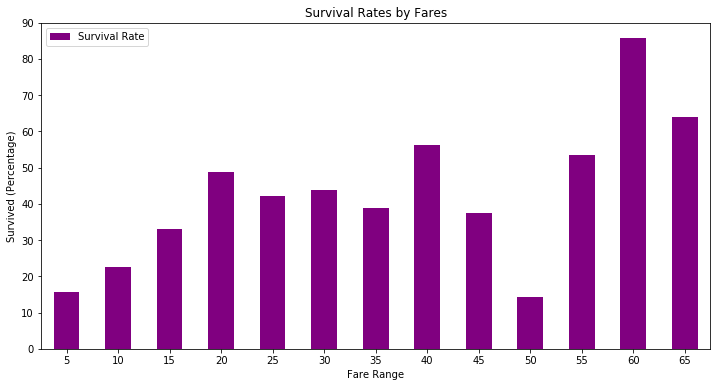

In [164]:
ax = fare_df.plot.bar(x='Fare Range', y='Survival Rate', rot=0, color='purple')
plt.gcf().set_size_inches(12, 6)
plt.ylabel('Survived (Percentage)')
plt.xlabel('Fare Range')
plt.title('Survival Rates by Fares')
plt.legend(loc='upper left')

### Ticket

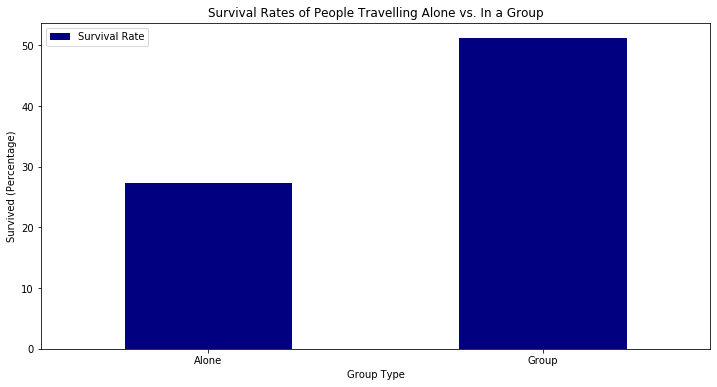

In [165]:
ax = ticket_df.plot.bar(x='Group', y='Survival Rate', rot=0, color='navy')
plt.gcf().set_size_inches(12, 6)
plt.ylabel('Survived (Percentage)')
plt.xlabel('Group Type')
plt.title('Survival Rates of People Travelling Alone vs. In a Group')
plt.legend(loc='upper left')

People travelling in a group were under the same ticket number.

# 5 Number Summary

## Fare

In [170]:
# Functions provided by Prof. Watson in HW2
# Numpy.quantile function could not handle the float calcualtions
def get_quantile_indexes(n, p):
    '''
    Calculate index values as input for interpolation
    
    input
    _____
    n (list) - the list of numbers
    p (float) - the percentage corresponding to the quantile (ex:0.25)
    
    output
    ______
    l, i, u (float) - the corresponding x1, x, x1 values as calculated via class
    '''
    i = p*(n+1) - 1
    l = np.floor(i)
    u = np.ceil(i)
    return l,i,u


def get_quantile(nums, q):
    '''
    Use the in-class method of interpolation to calculate the quantile
    
    input
    _____
    nums (list) - the list of numbers
    q (float) - the quantile desired
    
    output
    ______
    y (int/float) - this is the value in nums at the given quantile q
    '''
    x1, x, x2 = get_quantile_indexes(len(nums), q)
    if np.floor(x) == x1 and np.ceil(x) == x1:
        x = int(x)
        y = nums[x]
        # print('x = {}, y = {}'.format(x, y))
        return y
        
    # print('x1, x, x2 = {}, {}, {}'.format(x1, x, x2))
    y1, y2 = nums[int(x1)], nums[int(x2)]
    # print('y1, y2 = {}, {}'.format(y1, y2))
    y = (x - x1) * (y1-y2) / (x1 - x2) + y1
    # print('y =', y)
    return y

In [180]:
def q_summary_V2(numbers):
    dict = {}
    outliers = []
    arr = np.asarray(numbers)
    
    q1 = get_quantile(arr, 0.25)
    q2 = get_quantile(arr, 0.50)
    q3 = get_quantile(arr, 0.75)
    
    dict["q1"] = q1
    dict["q2"] = q2
    dict["q3"] = q3
    
    iqr = q3 - q1
    lowerbound = q1 - (1.5 * iqr)
    upperbound = q3 + (1.5 * iqr)
    
    i, j = 0,0 # to keep track of outliers
    #for x in numbers:
    #    if x < lowerbound:
    #        outliers.append(x)
    #        i+=1
    #    if x > upperbound:
    #        outliers.append(x)
    #        j+=1
    dict["min"] = arr[0 + i]
    dict["max"] = arr[-1 - j]
    
    #if len(outliers) != 0:
    #    print("The following are outliers: " + str(outliers))
    return dict

In [184]:
fare = df['fare'].dropna().sort_values()
print(q_summary_V2(fare))

{'q1': 7.9, 'q2': 14.45, 'q3': 31.28, 'min': 0.0, 'max': 512.33}
